mengimpor library yang diperlukan

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('games_data_2fixx.csv')

In [ ]:
features = dataset.loc[:, ['rating','score']].values
target = dataset.iloc[:, -1].values
print(target)

['recommended' 'recommended' 'recommended' ... 'not recommended'
 'recommended' 'recommended']


In [ ]:
target_name = dataset['recommend to play']

In [ ]:
# Membuat Objek Model Decision Tree
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0)

In [ ]:
#Mentraining Model Decision Tree
model = decisiontree.fit(features, target)

In [ ]:
test = model.predict(features)

In [ ]:
model

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0,
                       random_state=0)

In [ ]:
#Mengambil sampel observasi dan membuat prediksi
#Sampel berupa data dimensi kelopak
#Fungsi predict() => memeriksa kelas yang dimilikinya
#Fungsi predict_proba() => memeriksa probabilitas kelas dari prediksi tersebut
observation = [[2, 1]]
model.predict(observation)
model.predict_proba(observation)

print(observation)
print(model.predict(observation))
# print(model.predict_proba(observation))

[[2, 1]]
['not recommended']


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, test)
print(cm)

[[673   0]
 [  0 911]]


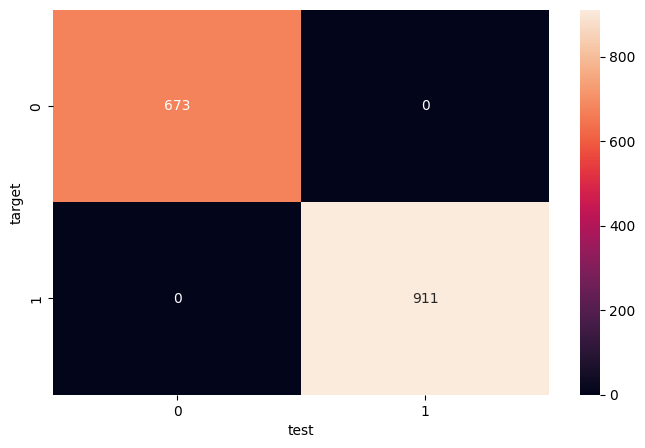

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(target, test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("test")
plt.ylabel("target")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(target, test))

                 precision    recall  f1-score   support

not recommended       1.00      1.00      1.00       673
    recommended       1.00      1.00      1.00       911

       accuracy                           1.00      1584
      macro avg       1.00      1.00      1.00      1584
   weighted avg       1.00      1.00      1.00      1584



In [ ]:
#Membuat grafik visualisasi Decision Tree
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(decisiontree, out_file=None, 
                                class_names=dataset['recommend to play'])
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('iris.png')

True

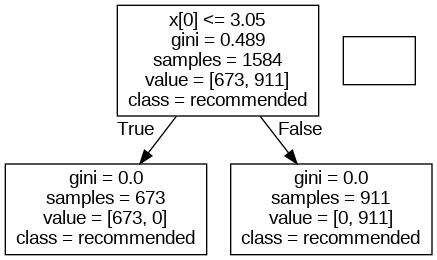

In [ ]:
from IPython.display import Image

Image(filename='iris.png')